In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweets_train_df = pd.read_csv('train.csv')

In [3]:
tweets_train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweets_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147 entries, 0 to 17146
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17147 non-null  int64 
 1   label   17147 non-null  int64 
 2   tweet   17147 non-null  object
dtypes: int64(2), object(1)
memory usage: 402.0+ KB


In [5]:
tweets_train_df.describe()

,id,label
count,17147.000000,17147.000000
mean,8574.002449,0.069633
std,4950.061105,0.254535
min,1.000000,0.000000
25%,4287.500000,0.000000
50%,8574.000000,0.000000
75%,12860.500000,0.000000
max,17149.000000,1.000000


In [6]:
tweets_train_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
17142                            pizza ðand ð¸vodka  
17143    @user when saying @user surname keep saying as...
17144     @user you're #1 for a reason @user you made f...
17145     @user [thankyoustudio /animal photographer/ (...
17146    good morning poh sa lahat...ððð    fa...
Name: tweet, Length: 17147, dtype: object

In [7]:
tweets_train_df.drop(['id'], axis=1, inplace=True)


In [8]:
tweets_train_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<AxesSubplot: >

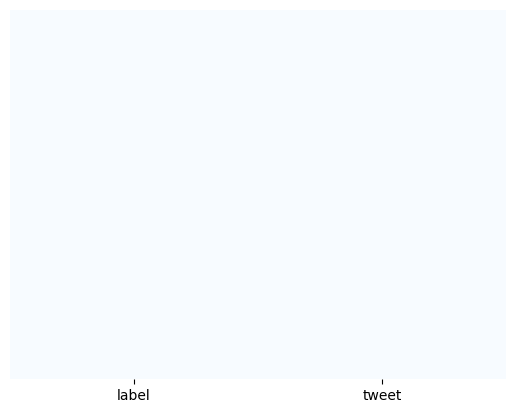

In [9]:
sns.heatmap(tweets_train_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')


array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

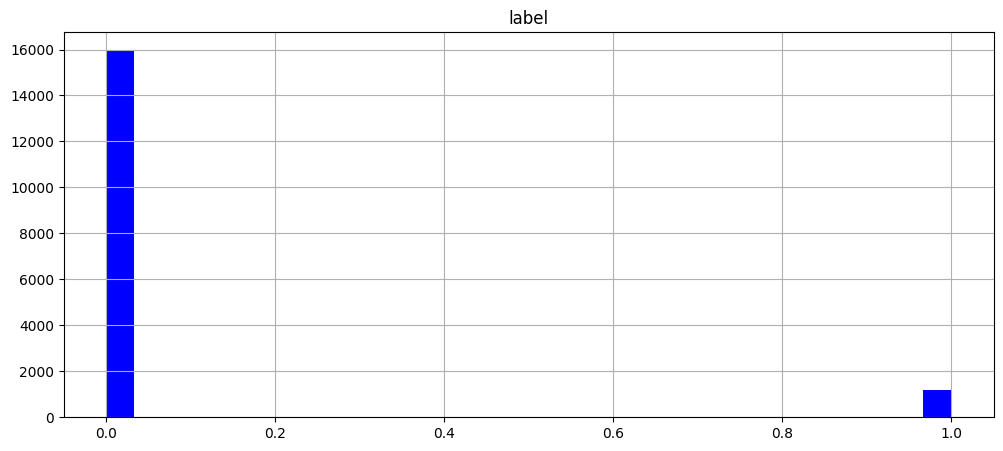

In [10]:
tweets_train_df.hist(bins= 30, figsize = (12,5), color = 'b')

<AxesSubplot: xlabel='label', ylabel='count'>

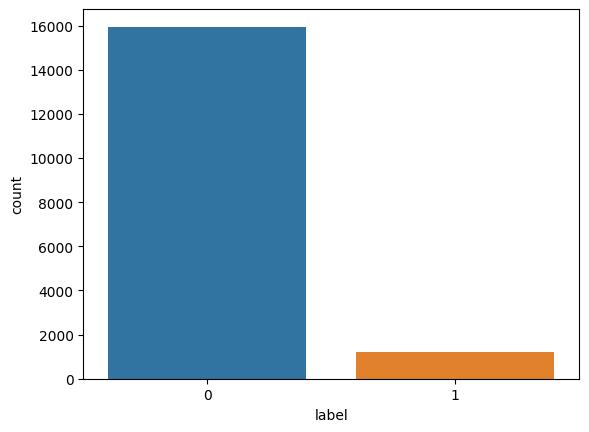

In [11]:
sns.countplot(x=tweets_train_df['label'] ,data=tweets_train_df)


In [12]:
tweets_train_df['lengths'] = tweets_train_df['tweet'].apply(len)


In [13]:
tweets_train_df.head()


,label,tweet,lengths
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


<AxesSubplot: ylabel='Frequency'>

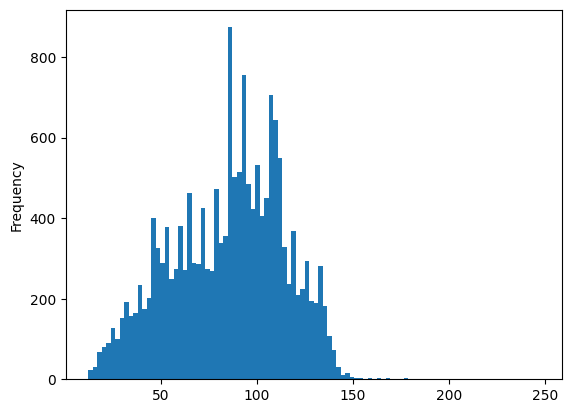

In [14]:
tweets_train_df['lengths'].plot(bins=100, kind = 'hist')

In [15]:
tweets_train_df.describe()

,label,lengths
count,17147.000000,17147.000000
mean,0.069633,84.841897
std,0.254535,29.208758
min,0.000000,12.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,107.000000
max,1.000000,247.000000


In [16]:
tweets_train_df[tweets_train_df['lengths']==18]['tweet'].iloc[0]


'@user 100% agree  '

In [17]:
tweets_train_df[tweets_train_df['lengths']==85]


,label,tweet,lengths
115,0,â #under the spell of brexit referendum - c...,85
242,0,make today count! #mondaymotivation #livelifet...,85
384,0,"dream palace, can we move in already? #stellar...",85
573,0,@user monkeys are also declared as vermin. no ...,85
634,0,save thousands $$ free search x logins x broke...,85
...,...,...,...
16801,0,sunny tuesday ! #cute #nice #laugh #love #glam...,85
16889,0,just booked a few days in a shepherd's hut wit...,85
17002,0,@user @user projected sales for five years.. ...,85
17045,0,"won't spare leader #kolianwali, will meet th...",85


In [18]:
positive = tweets_train_df[tweets_train_df['label']==0]
positive

,label,tweet,lengths
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
17142,0,pizza ðand ð¸vodka,25
17143,0,@user when saying @user surname keep saying as...,113
17144,0,@user you're #1 for a reason @user you made f...,105
17145,0,@user [thankyoustudio /animal photographer/ (...,105


In [19]:
negative = tweets_train_df[tweets_train_df['label']==1]
negative

,label,tweet,lengths
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
17040,1,islam against racism - press tv,34
17051,1,@user you might be a libtard if... #libtard #...,69
17067,1,@user obama/jarretts who agenda was to destroy...,111
17083,1,good morning! bud and breakfast? marijuana unl...,66


In [20]:
from wordcloud import WordCloud

In [21]:
sentences = tweets_train_df['tweet'].tolist()

In [22]:
len(sentences)

17147

In [23]:
sentences_as_single_string = " ".join(sentences)

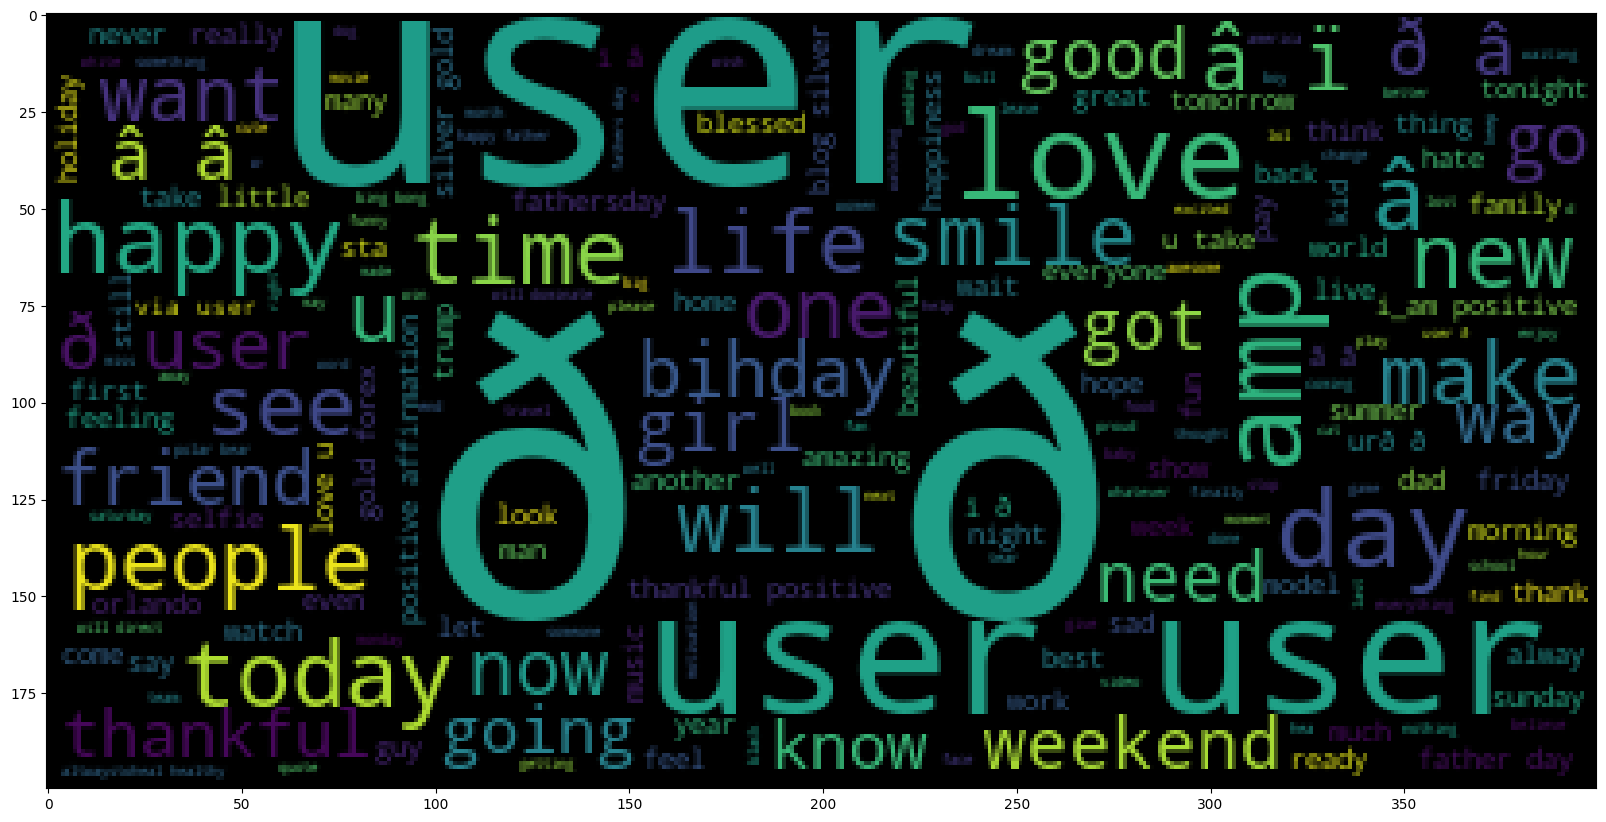

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_string))

In [25]:
negative_sentences = negative['tweet'].tolist()
negative_string = " ".join(negative_sentences)

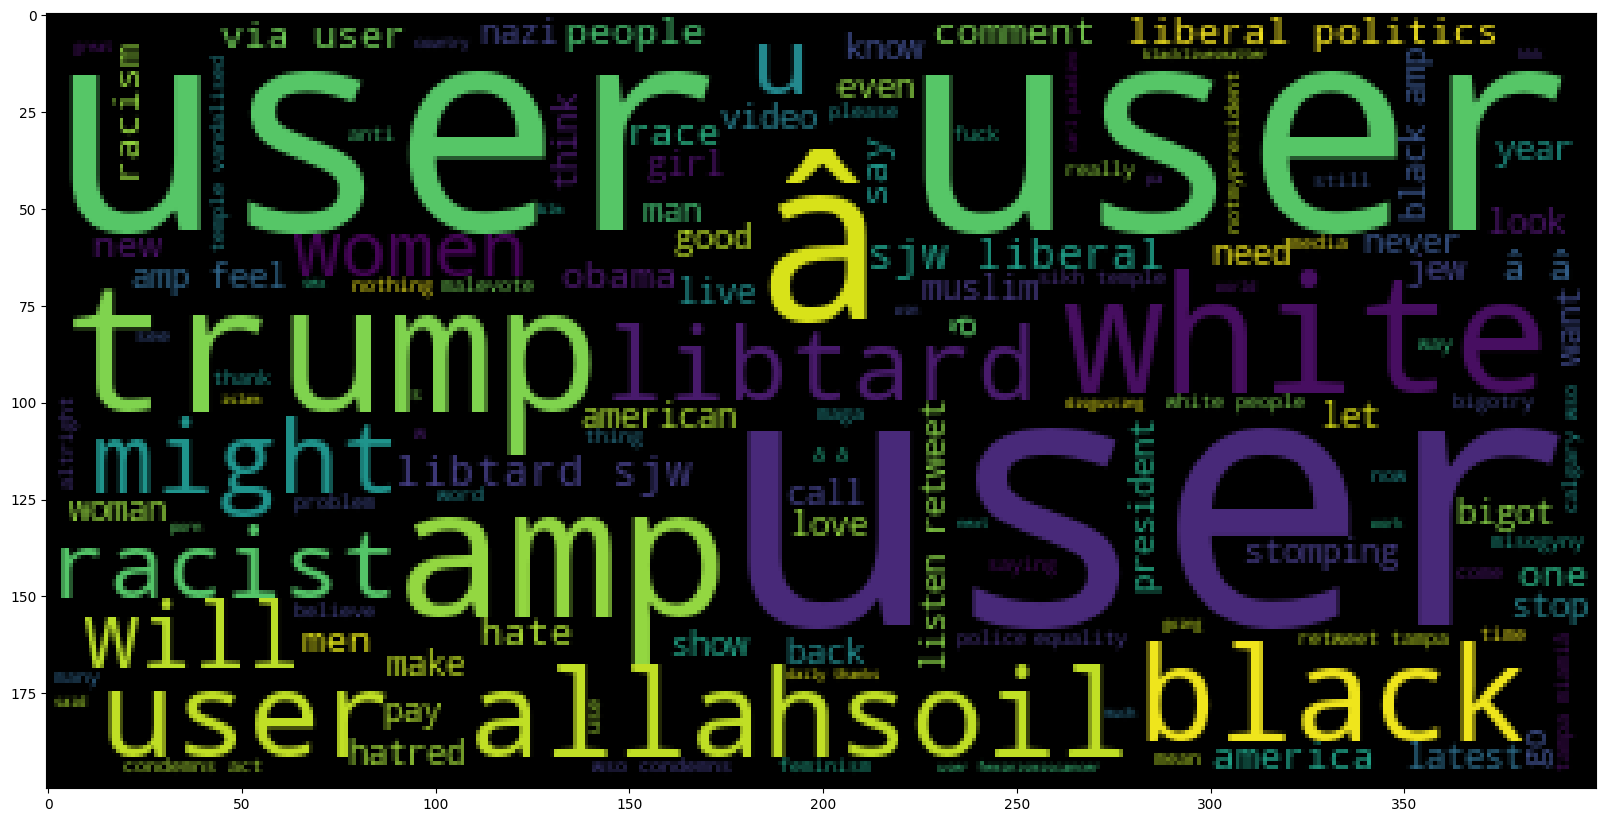

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_string))

In [27]:
import nltk #Natural language toolkit


In [28]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def text_cleaning(text):
    remv_punc = [char for char in text.lower() if char not in string.punctuation]
    remv_punc_join = ''.join(remv_punc)
    remv_punc_clean = [word for word in remv_punc_join.split() if word.lower() not in stopwords.words('english')]
    return remv_punc_clean

In [30]:
import string

In [31]:
tweets_df_clean = tweets_train_df['tweet'].apply(text_cleaning)
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [32]:
tweets_train_df['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vectorizer_analyzer = CountVectorizer(analyzer = text_cleaning)
countvectorizer_tweets = CountVectorizer(analyzer= text_cleaning, dtype= 'uint8').fit_transform(tweets_train_df['tweet']).toarray()

In [35]:
countvectorizer_tweets.shape

(17147, 31314)

In [36]:
X_features = countvectorizer_tweets
y_label = tweets_train_df['label']


In [37]:
X_features.shape

(17147, 31314)

In [38]:
y_label.shape

(17147,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 1)

In [40]:
from sklearn.naive_bayes import MultinomialNB
NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(X_train,y_train)

MultinomialNB()

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
y_pred_test = NaiveBclassifier.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred_test)

0.9355685131195335

<AxesSubplot: >

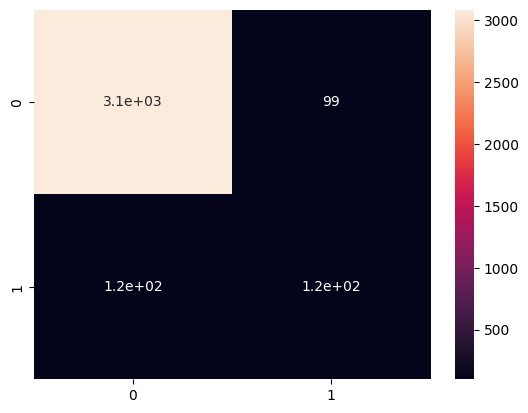

In [44]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot= True)

In [45]:
tweets_test_df = pd.read_csv('test.csv')
tweets_test_df.head()

,id,tweet
0,1,#studiolife #aislife #requires #passion #dedic...
1,2,@user #white #supremacists want everyone to s...
2,3,safe ways to heal your #acne!! #altwaystohe...
3,4,is the hp and the cursed child book up for res...
4,5,"3rd #bihday to my amazing, hilarious #nephew..."


In [46]:
tweets_test_df.drop(['id'], axis=1, inplace=True)

In [47]:
tweets_train_df.describe()

,label,lengths
count,17147.000000,17147.000000
mean,0.069633,84.841897
std,0.254535,29.208758
min,0.000000,12.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,107.000000
max,1.000000,247.000000


In [48]:
tweets_df_clean = tweets_test_df['tweet'].apply(text_cleaning)

In [49]:
tweets_test_df['tweet'][5]

'choose to be   :) #momtips '

In [50]:
vectorizer_analyzer = CountVectorizer(analyzer = text_cleaning)
countvectorizer_tweets = CountVectorizer(analyzer= text_cleaning, dtype= 'uint8').fit_transform(tweets_test_df['tweet']).toarray()

In [51]:
X_features = countvectorizer_tweets
X_features.shape

(17235, 31314)

In [52]:
X_test=X_features

In [53]:
y_pred_test = NaiveBclassifier.predict(X_test)

In [54]:
print(y_pred_test)

[1 0 1 ... 1 1 1]


In [55]:
tweets_test_df["Label"]=y_pred_test

In [56]:
tweets_test_df.head()

,tweet,Label
0,#studiolife #aislife #requires #passion #dedic...,1
1,@user #white #supremacists want everyone to s...,0
2,safe ways to heal your #acne!! #altwaystohe...,1
3,is the hp and the cursed child book up for res...,1
4,"3rd #bihday to my amazing, hilarious #nephew...",1
